Import related packages

In [5]:
import numpy as np
import cv2
import dlib
from scipy.spatial import Delaunay
import sys
from matplotlib import pyplot as plt

First image in use

The original image:


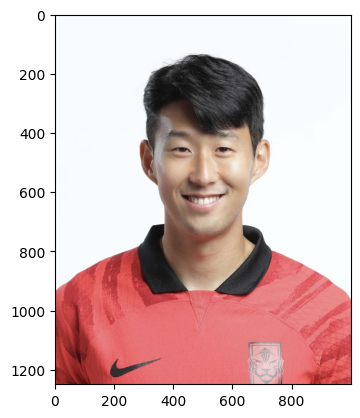

In [6]:
img1 = cv2.imread("Son.jpg")
print("The original image:")
show_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)
plt.show()

Second image in use

The similar image:


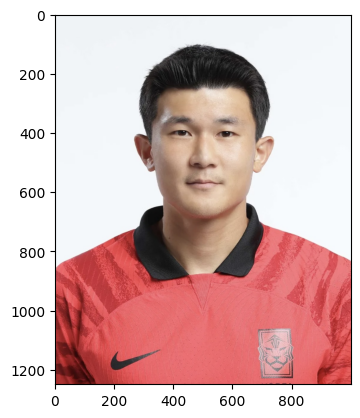

In [7]:
img2 = cv2.imread("MinJae.jpg")
print("The similar image:")
show_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)
plt.show()

dlib model **shape_predictor_68_face_landmarks.dat**, used, more information about this model can be found in [dlib model](https://github.com/davisking/dlib-models).

In [8]:
predictor_model = 'shape_predictor_68_face_landmarks.dat'

define the **get_points** function to get the face landmarks(68 points) and image frame coordinates(8 points). 

In [9]:
def get_points(image):
    
    # Use dlib to get the face landmarks(68 points)
    face_detector = dlib.get_frontal_face_detector()
    face_pose_predictor = dlib.shape_predictor(predictor_model)
    try:
        detected_face = face_detector(image, 1)[0]
    except:
        print('No face detected in image {}'.format(image))
    pose_landmarks = face_pose_predictor(image, detected_face)
    points = []
    for p in pose_landmarks.parts():
        points.append([p.x, p.y])

    # Add 8 image frame coordinate points
    x = image.shape[1] - 1
    y = image.shape[0] - 1
    points.append([0, 0])
    points.append([x // 2, 0])
    points.append([x, 0])
    points.append([x, y // 2])
    points.append([x, y])
    points.append([x // 2, y])
    points.append([0, y])
    points.append([0, y // 2])

    return np.array(points)

print the face landmarks points in two images.

The first 10 points in points1:
[[332 455]
 [333 502]
 [340 549]
 [350 593]
 [369 636]
 [396 675]
 [429 708]
 [467 734]
 [509 743]
 [551 733]]
The orininal image with landmarks:


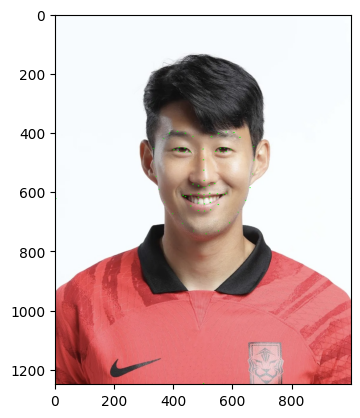

In [10]:
points1 = get_points(img1)
img1_show = np.zeros(img１.shape,np.uint8)
img1_show = img１.copy()  
for idx, point in enumerate(points1):
    pos = (point[0], point[1])
    cv2.putText(img1_show,str(idx),pos,fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale=0.1,color=(0,255,0))
print ("The first 10 points in points1:")
print (points1[0:10])
print ("The orininal image with landmarks:")
show_img = cv2.cvtColor(img1_show, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)
plt.show()

The first 10 points in points2:
[[322 408]
 [326 455]
 [334 502]
 [344 548]
 [359 592]
 [386 629]
 [423 659]
 [466 680]
 [510 686]
 [553 678]]
The similar image with landmarks:


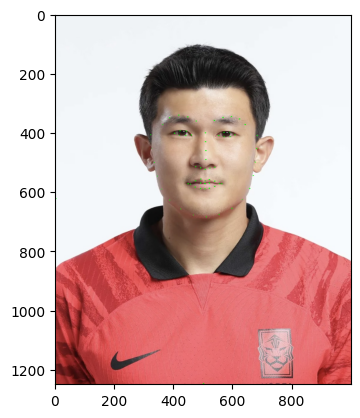

In [11]:
points2 = get_points(img2)
img2_show = np.zeros(img2.shape,np.uint8)
img2_show = img2.copy()
for idx, point in enumerate(points2):
    pos = (point[0], point[1])
    cv2.putText(img2_show,str(idx),pos,fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale=0.1,color=(0,255,0))
show_img = cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB) 
print ("The first 10 points in points2:")
print (points2[0:10])
print ("The similar image with landmarks:")
plt.imshow(show_img)
plt.show()

define alpha as the merge percentage of these two image.

In [12]:
alpha = 0.5
# Calculate the average coordinates of points in two images
points = (1 - alpha) * np.array(points1) + alpha * np.array(points2)
print ("The first 10 points in points:")
print (points[0:10])

The first 10 points in points:
[[327.  431.5]
 [329.5 478.5]
 [337.  525.5]
 [347.  570.5]
 [364.  614. ]
 [391.  652. ]
 [426.  683.5]
 [466.5 707. ]
 [509.5 714.5]
 [552.  705.5]]


define an all-zero matrix **img_morphed** to store the merge image.

In [13]:
img1 = np.float32(img1)
img2 = np.float32(img2)
img_morphed = np.zeros(img1.shape, dtype=img1.dtype)
print ("The first 10 points in img1:")
print (img1[0:10])
print ("The first 10 points in img2:")
print (img2[0:10])
print ("The first 10 points in img_morphed:")
print (img_morphed[0:10])

The first 10 points in img1:
[[[251. 252. 248.]
  [251. 252. 248.]
  [253. 252. 248.]
  ...
  [255. 254. 250.]
  [255. 254. 250.]
  [255. 254. 250.]]

 [[251. 252. 248.]
  [251. 252. 248.]
  [253. 252. 248.]
  ...
  [255. 254. 250.]
  [255. 254. 250.]
  [255. 254. 250.]]

 [[253. 252. 248.]
  [253. 252. 248.]
  [253. 252. 248.]
  ...
  [255. 254. 250.]
  [255. 254. 250.]
  [255. 254. 250.]]

 ...

 [[253. 252. 248.]
  [253. 252. 248.]
  [253. 252. 248.]
  ...
  [255. 254. 250.]
  [255. 254. 250.]
  [255. 254. 250.]]

 [[252. 251. 247.]
  [253. 252. 248.]
  [253. 252. 248.]
  ...
  [255. 254. 250.]
  [255. 254. 250.]
  [255. 254. 250.]]

 [[252. 251. 247.]
  [252. 251. 247.]
  [253. 252. 248.]
  ...
  [255. 254. 250.]
  [255. 254. 250.]
  [255. 254. 250.]]]
The first 10 points in img2:
[[[246. 243. 239.]
  [246. 243. 239.]
  [246. 243. 239.]
  ...
  [251. 248. 244.]
  [251. 248. 244.]
  [251. 248. 244.]]

 [[246. 243. 239.]
  [246. 243. 239.]
  [246. 243. 239.]
  ...
  [251. 248. 244.]


**get_triangles** function is defined to use the [Delaunay triangulation](https://en.wikipedia.org/wiki/Delaunay_triangulation) to process the feature points in images.

In [14]:
def get_triangles(points):
    return Delaunay(points).simplices

First image with Delaunay triangulation:


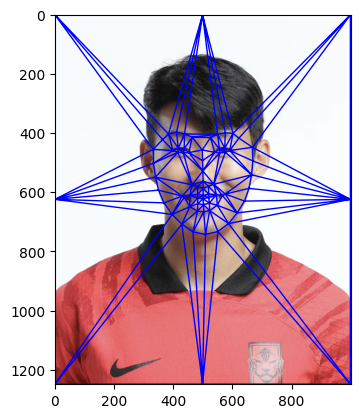

In [15]:
triangles1 = get_triangles(points1)
print ("First image with Delaunay triangulation:")
show_img = cv2.cvtColor(img１_show, cv2.COLOR_BGR2RGB) 
plt.triplot(points1[:,0], points1[:,1], triangles1,linewidth=1,color='b')
plt.imshow(show_img)
plt.show()

Second image with Delaunay triangulation:


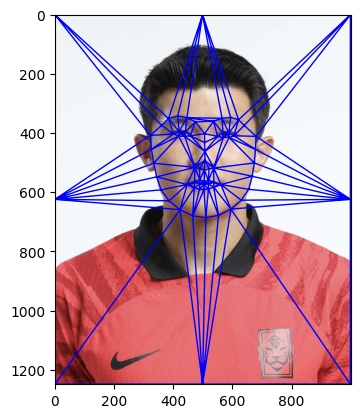

In [16]:
triangles2 = get_triangles(points2)
print ("Second image with Delaunay triangulation:")
show_img = cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB) 
plt.triplot(points2[:,0], points2[:,1], triangles2,linewidth=1,color='b')
plt.imshow(show_img)
plt.show()

In [17]:
triangles = get_triangles(points)
print ("The first 10 points in triangles:")
print (triangles[0:10])

The first 10 points in triangles:
[[10 71 72]
 [71 16 70]
 [ 8  9 73]
 [73  9 72]
 [ 9 10 72]
 [12 13 71]
 [ 6 73 74]
 [75  6 74]
 [10 11 71]
 [11 12 71]]


We define **affine_transform** to accomplish the affine transform for hte image based on the Delaunay triangulation result.

In [18]:
def affine_transform(input_image, input_triangle, output_triangle, size):
    warp_matrix = cv2.getAffineTransform(
        np.float32(input_triangle), np.float32(output_triangle))
    output_image = cv2.warpAffine(input_image, warp_matrix, (size[0], size[1]), None,
                                  flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    return output_image

In [19]:
for i in triangles:
    
    # Calculate the frame of triangles
    x = i[0]
    y = i[1]
    z = i[2]

    tri1 = [points1[x], points1[y], points1[z]]
    tri2 = [points2[x], points2[y], points2[z]]
    tri = [points[x], points[y], points[z]]
    
    rect1 = cv2.boundingRect(np.float32([tri1]))
    rect2 = cv2.boundingRect(np.float32([tri2]))
    rect = cv2.boundingRect(np.float32([tri]))

    tri_rect1 = []
    tri_rect2 = []
    tri_rect_warped = []

    
    for i in range(0, 3):
        tri_rect_warped.append(((tri[i][0] - rect[0]), (tri[i][1] - rect[1])))
        tri_rect1.append(((tri1[i][0] - rect1[0]), (tri1[i][1] - rect1[1])))
        tri_rect2.append(((tri2[i][0] - rect2[0]), (tri2[i][1] - rect2[1])))

    # Generate the mask
    mask = np.zeros((rect[3], rect[2], 3), dtype=np.float32)
    cv2.fillConvexPoly(mask, np.int32(tri_rect_warped), (1.0, 1.0, 1.0), 16, 0)
    
    # Accomplish the affine transform in triangles
    img1_rect = img1[rect1[1]:rect1[1] + rect1[3], rect1[0]:rect1[0] + rect1[2]]
    img2_rect = img2[rect2[1]:rect2[1] + rect2[3], rect2[0]:rect2[0] + rect2[2]]

    size = (rect[2], rect[3])
    warped_img1 = affine_transform(img1_rect, tri_rect1, tri_rect_warped, size)
    warped_img2 = affine_transform(img2_rect, tri_rect2, tri_rect_warped, size)
    
    # Calculate the result based on alpha
    img_rect = (1.0 - alpha) * warped_img1 + alpha * warped_img2

    # Accomplish the mask in the merged image
    img_morphed[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]] = img_morphed[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]] * (1 - mask) + img_rect * mask


In [20]:
img_morphed = np.uint8(img_morphed)

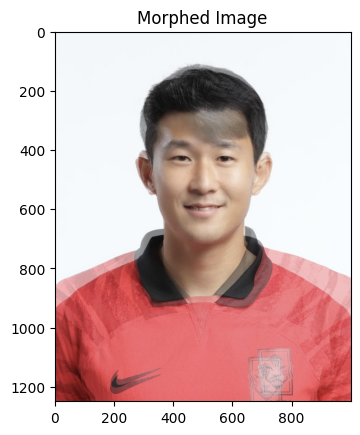

In [21]:
plt.title('Merged Image')   
show_img = cv2.cvtColor(img_morphed, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)
plt.show()

Final result:


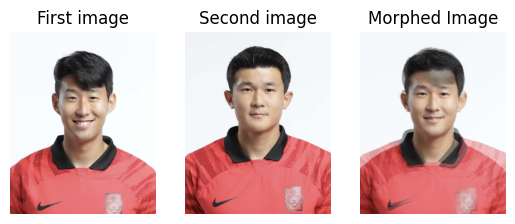

In [22]:
print ("Final result:")
plt.subplot(1,3,1)     
plt.title('First image')   
img1_original = cv2.imread("Son.jpg")
show_img = cv2.cvtColor(img1_original, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img) 
plt.axis('off') 

plt.subplot(1,3,2)     
plt.title('Second image')   
img2_original = cv2.imread("MinJae.jpg")
show_img = cv2.cvtColor(img2_original, cv2.COLOR_BGR2RGB)  
plt.imshow(show_img)   
plt.axis('off') 

plt.subplot(1,3,3)     
plt.title('Merged Image')   
show_img = cv2.cvtColor(img_morphed, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img)
plt.axis('off') 
plt.show()